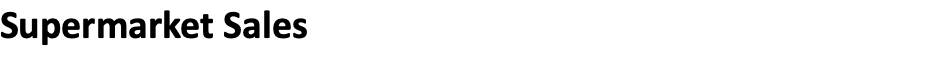

# Unlocking Customer Insights: Machine Learning Analysis of Supermarket Sales Data for Targeted Marketing and Sales Optimization

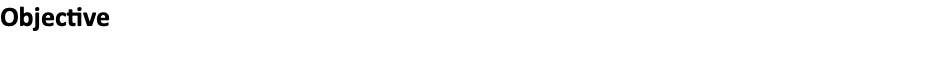

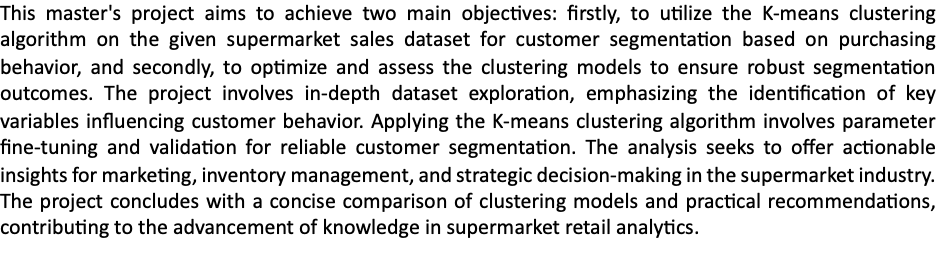

### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

### Loading the Dataset

In [2]:
# Load the CSV data into a Pandas dataframe
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.shape

(1000, 17)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Columns date and time are displayed as objects let us change their data types:


In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])


df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')

# Extract the time part and convert to datetime.time
df['Time'] = df['Time'].apply(lambda x: x.time())
# Print the updated DataFrame with data types
print(df.dtypes)
df.head()

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Calculate Summary Statistics for Numeric Attributes:

In [7]:
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

### Checking For missing values:

In [8]:
df.replace(['', '?', 'na', 'NaN', 'N/A'], pd.NA, inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


### Count the Frequency of Categorical Attributes:

In [9]:
# Frequency counts for categorical attributes
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n\nFrequency counts for {column}:")
    print(df[column].value_counts())



Frequency counts for Invoice ID:
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64


Frequency counts for Branch:
A    340
B    332
C    328
Name: Branch, dtype: int64


Frequency counts for City:
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Frequency counts for Customer type:
Member    501
Normal    499
Name: Customer type, dtype: int64


Frequency counts for Gender:
Female    501
Male      499
Name: Gender, dtype: int64


Frequency counts for Product line:
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


Frequency counts for Time:
19:48:00    7
14:42:00    7
17:38:00    6
17:16:00    5
11:40:00    5
        

### EDA

### Let us explore the numerical and categorical columns and its distributions:

In [10]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [11]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

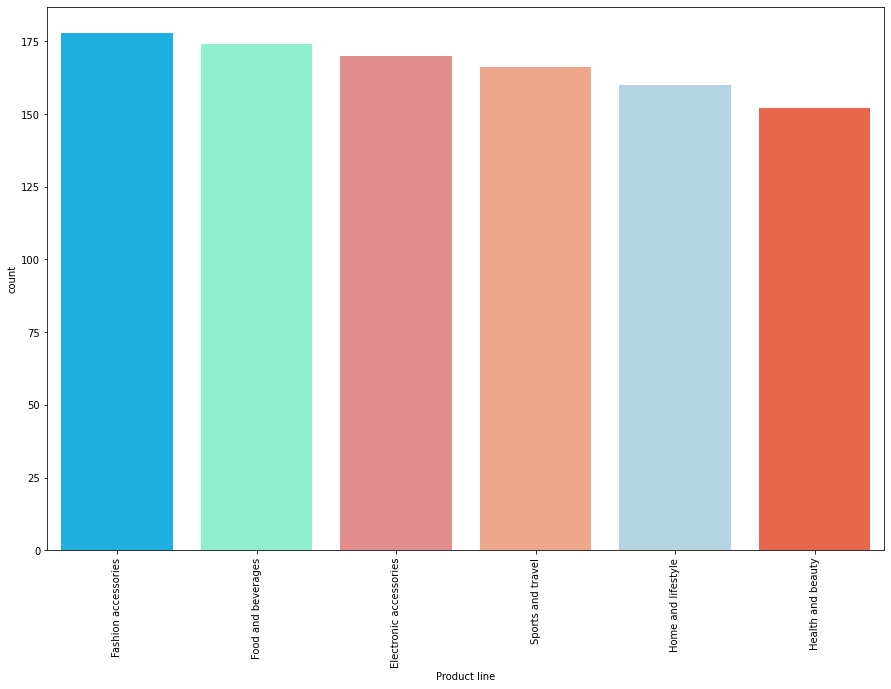

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Which product line has the most number of purchases?
plt.figure(figsize=(15, 10))
product_line_counts = df['Product line'].value_counts()

# Define custom colors for each product line
new_colors = ['#00BFFF', '#7FFFD4', '#F08080', '#FFA07A', '#ADD8E6', '#FF5733']  
sns.countplot(x="Product line", data=df, order=product_line_counts.index, palette=new_colors)
plt.xticks(rotation=90)
plt.show()

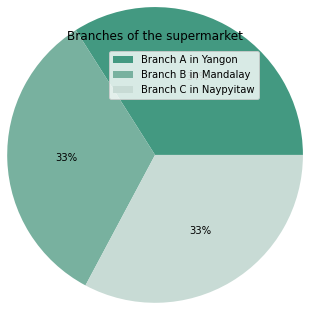

In [13]:
# Define the branch data as a list with counts for each branch
branch = [340, 332, 328]

# Set the radius of the pie chart
radius = 1.7

# Define colors for each branch
colors = ["#439981", "#78b19f", "#c8dbd5"]

# Disable label rotation
rotatelabels = False

# Display percentage values on the pie chart
autopct = "%1.0f%%"

# Create the pie chart
plt.pie(branch, radius=radius, colors=colors, rotatelabels=rotatelabels, autopct=autopct)

# Set the title of the chart
plt.title('Branches of the supermarket')

# Add a legend to label each branch
plt.legend(labels=["Branch A in Yangon", "Branch B in Mandalay", "Branch C in Naypyitaw"])

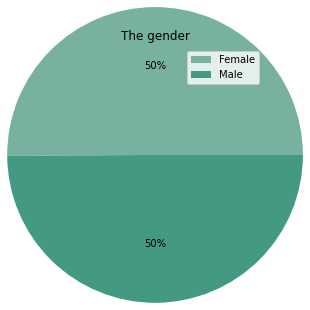

In [14]:
# Define the gender data as a list with counts for each gender
gender = [501, 499]

# Set the radius of the pie chart
radius = 1.7

# Define colors for each gender
colors = ["#78b19f", "#439981"]

# Disable label rotation
rotatelabels = False

# Display percentage values on the pie chart
autopct = "%1.0f%%"

# Create the pie chart
plt.pie(gender, radius=radius, colors=colors, rotatelabels=rotatelabels, autopct=autopct)

# Set the title of the chart
plt.title('The gender')

# Add a legend to label each gender
plt.legend(labels=["Female", "Male"])

In [15]:
df["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name):
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")

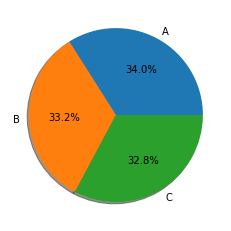

In [17]:
pie_plot("Branch")

In [18]:
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

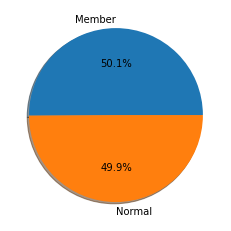

In [19]:
pie_plot("Customer type")

In [20]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [21]:
def count_plot(x_axis, hue = None, rotation = 0):
    
    graph = sns.countplot(x = x_axis, data = df, hue = hue, order = df[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

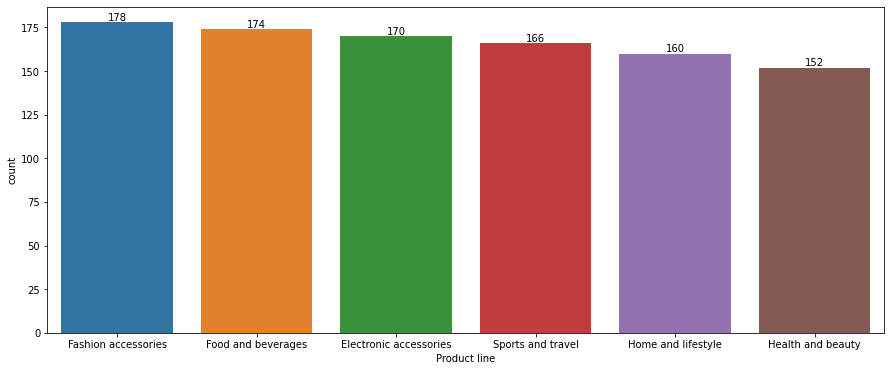

In [22]:
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot("Product line") 

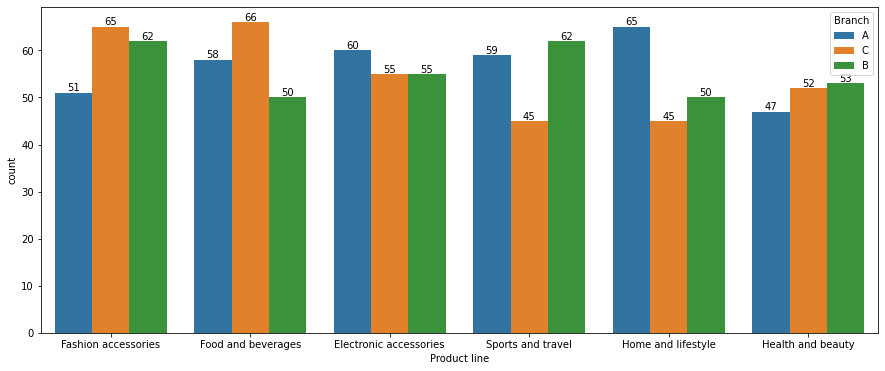

In [23]:
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Branch")

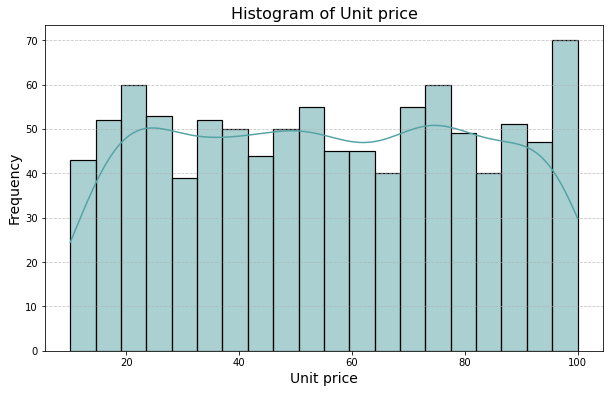

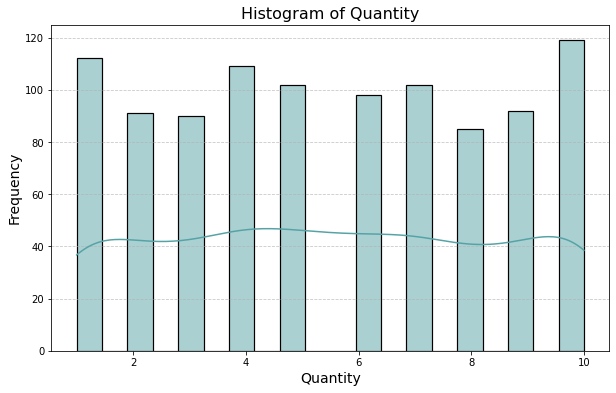

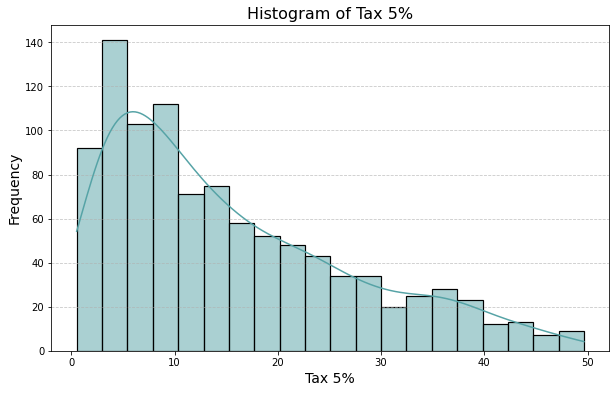

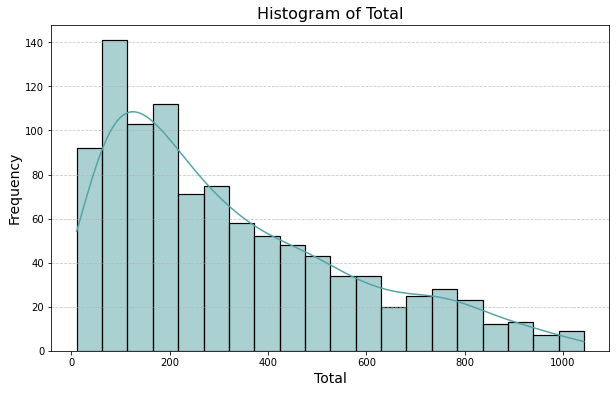

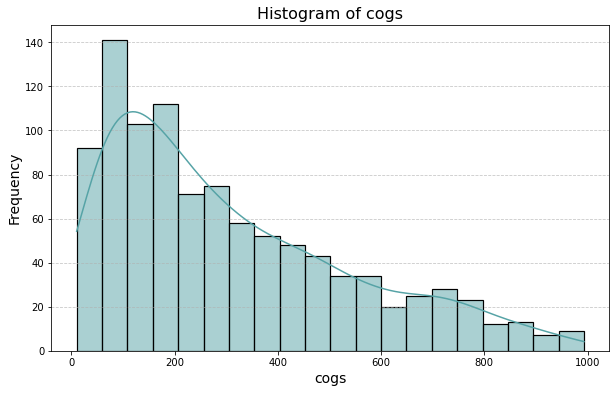

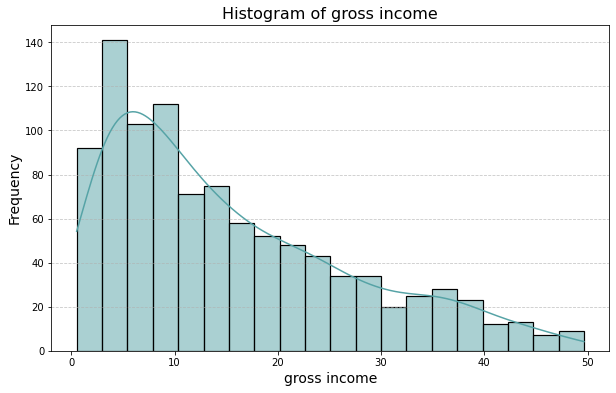

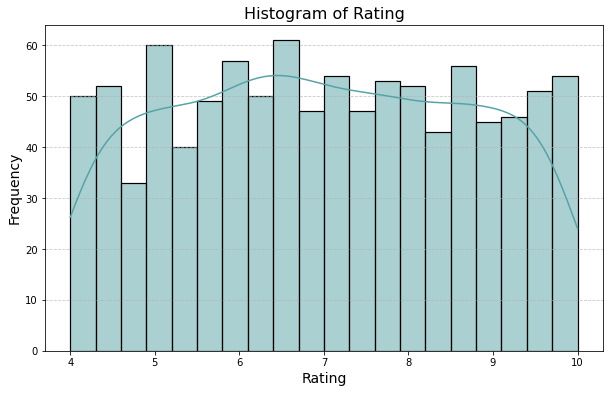

In [24]:
#to check distributions we use Histograms
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=20, kde=True, color='#56A3A6', edgecolor='black', linewidth=1.2)
    plt.title(f'Histogram of {column}',fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

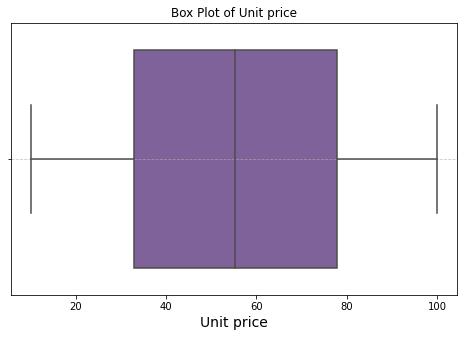

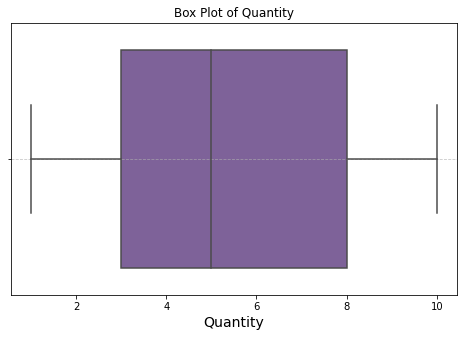

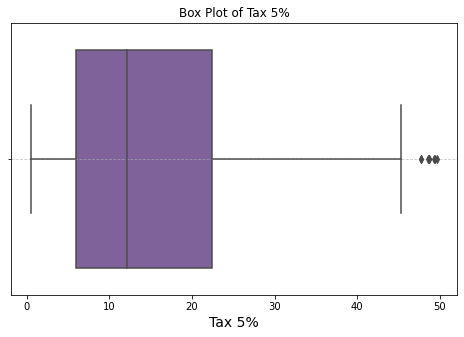

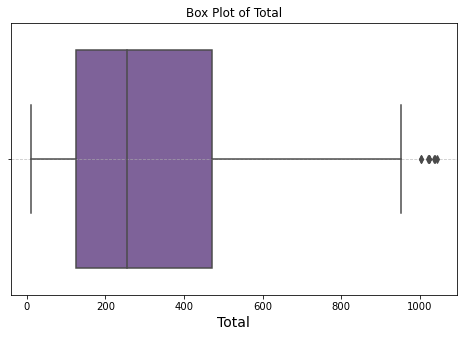

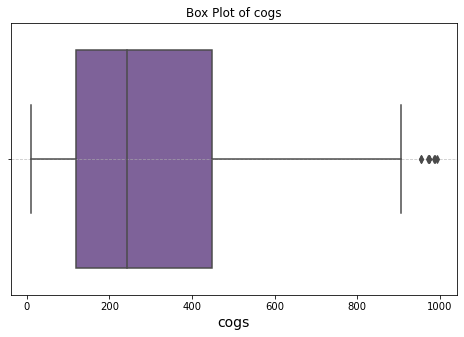

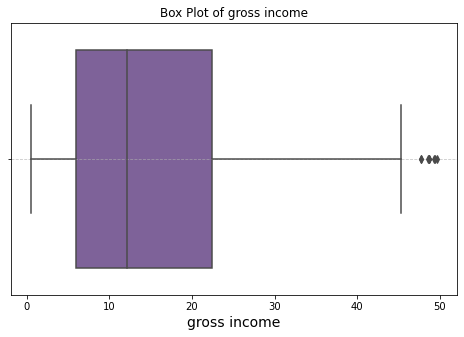

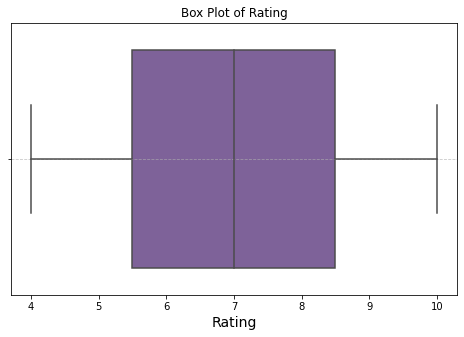

In [25]:
#For outlier analysis let's use box plots:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column],color='#7E59A2')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### CORRELATION MATRIX

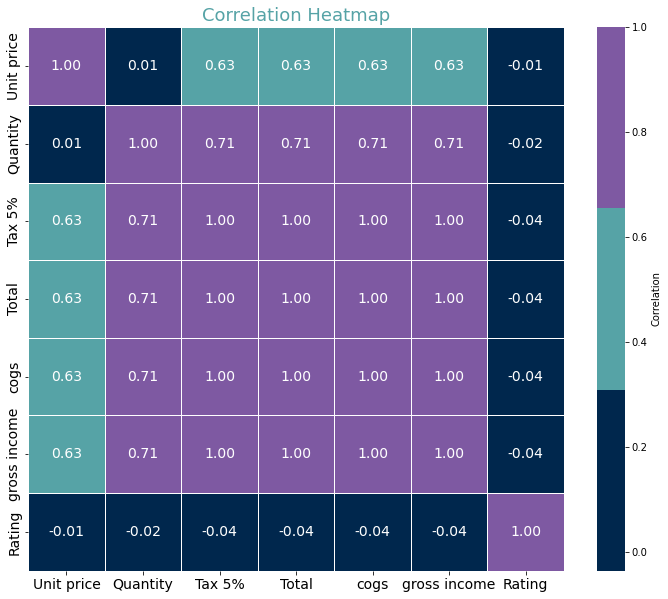

In [26]:
correlation_matrix = df[numerical_columns].corr()
sns.set_palette("Set3")

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=['#00274D', '#56A3A6', '#7E59A2'], 
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation'},
    annot_kws={'size': 14}
)

plt.title('Correlation Heatmap', fontsize=18, color='#56A3A6')
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.show()

<Figure size 864x720 with 0 Axes>

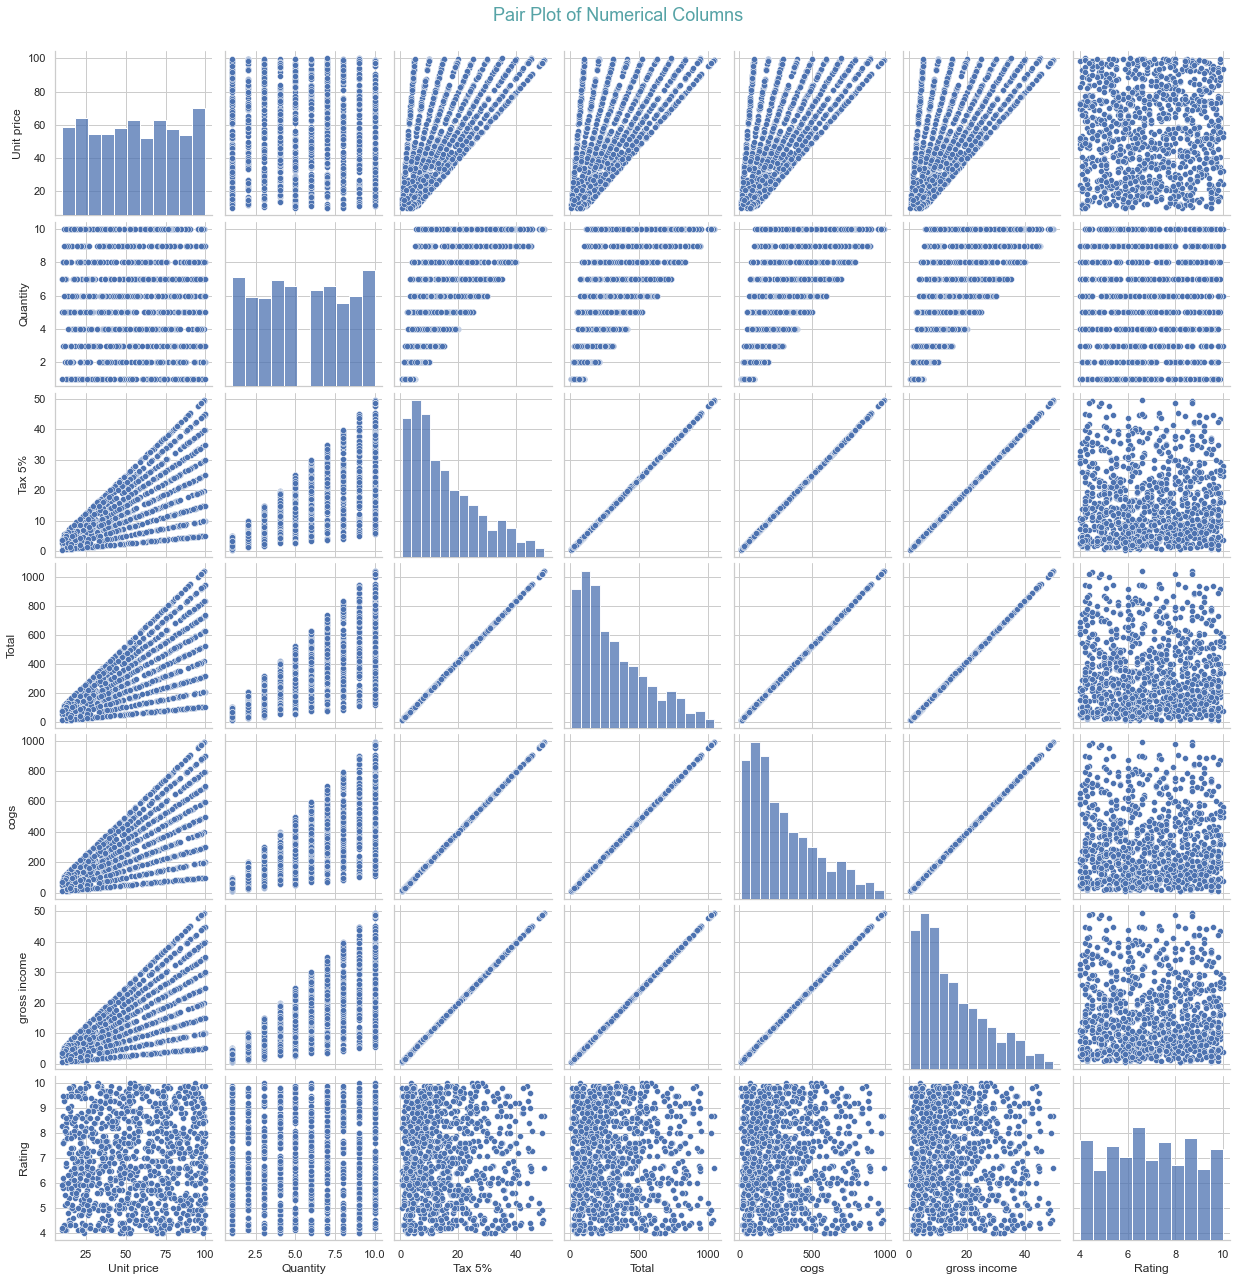

In [27]:
sns.set_palette("muted")

# Create a fancier pair plot with the new color palette
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02, fontsize=18, color='#56A3A6')  # Light blue title
plt.show()

### CATEGORICAL COLUMNS

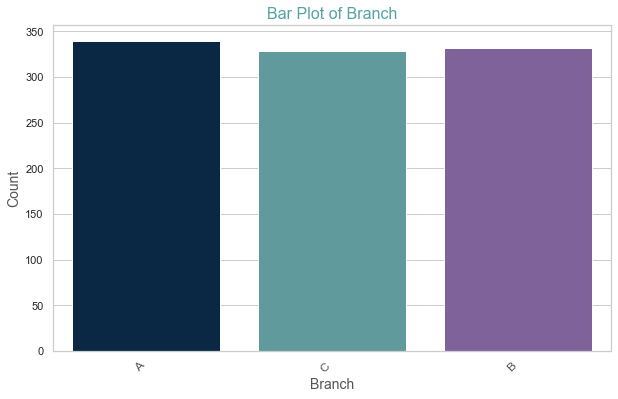

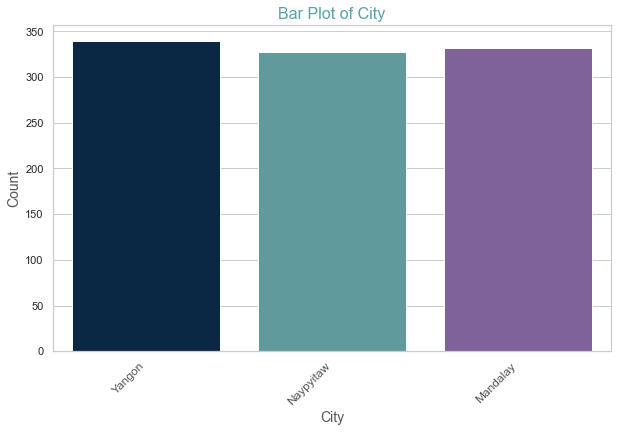

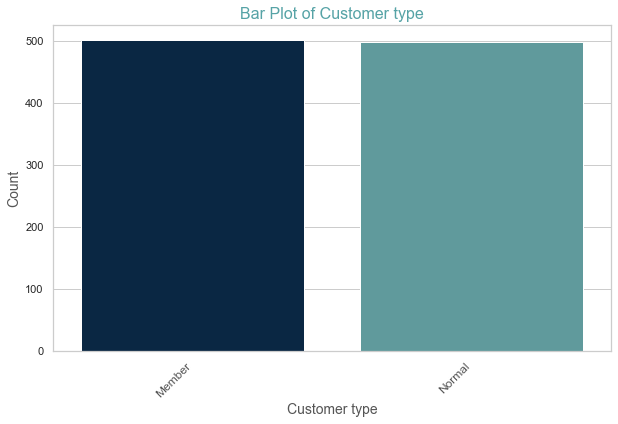

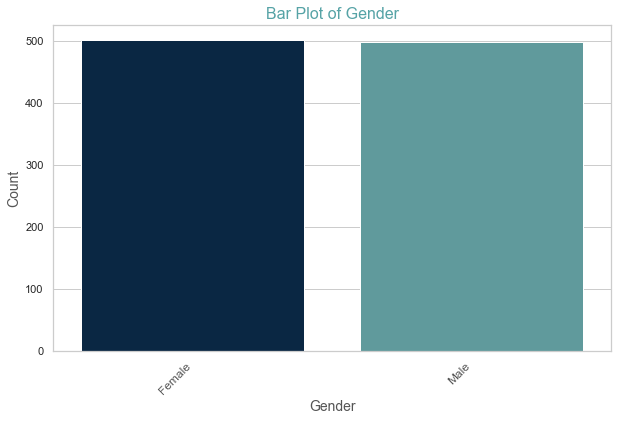

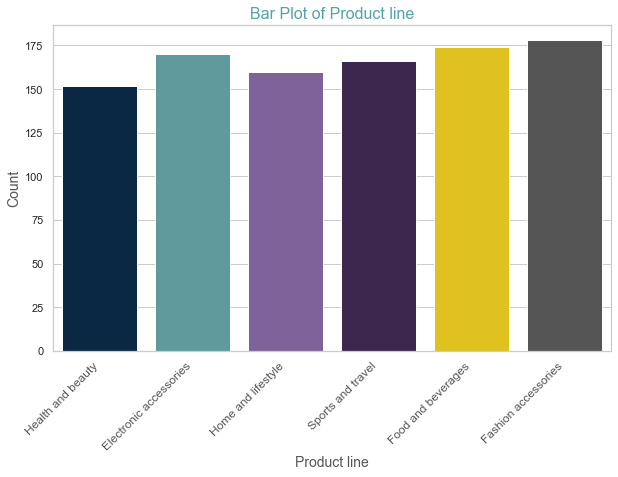

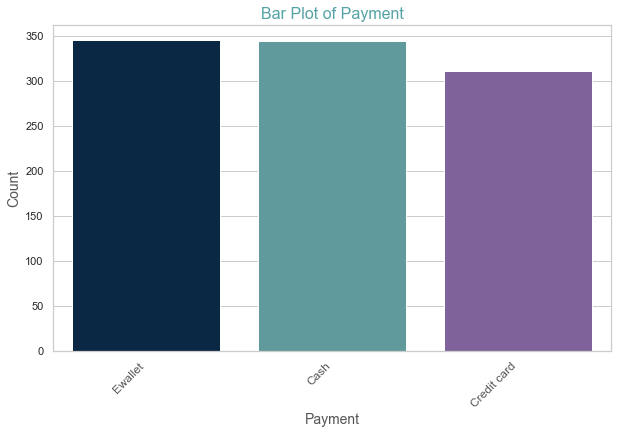

In [28]:

categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
colors = ['#00274D', '#56A3A6', '#7E59A2', '#3E2055', '#FFD700', '#555555']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column], palette=colors)
    plt.title(f'Bar Plot of {column}', fontsize=16, color='#56A3A6')  # Light blue title
    plt.xlabel(column, fontsize=14, color='#555555')  # Dark gray x-axis label
    plt.ylabel('Count', fontsize=14, color='#555555')  # Dark gray y-axis label
    plt.xticks(rotation=45, ha='right', fontsize=12, color='#555555')

    plt.show()

### Remove Multicollinearity

We are removing cogs, gross income and Tax 5% due to multicollinearity and we are keeping the column Total.

In [31]:
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

       Time      Payment    cogs  gross margin percentage  gross income  \
0  13:08:00      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00   

In [32]:
# Assuming 'df' is your DataFrame
columns_to_remove = ['cogs', 'gross income', 'Tax 5%']

# Remove specified columns after removing whitespaces
df_2 = df.drop(columns=columns_to_remove)

# Display the updated DataFrame
print(df_2.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity     Total       Date  \
0       Health and beauty       74.69         7  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  340.5255 2019-03-03   
3       Health and beauty       58.22         8  489.0480 2019-01-27   
4       Sports and travel       86.31         7  634.3785 2019-02-08   

       Time      Payment  gross margin percentage  Rating  
0  13:08:00      Ewallet                 4.761905     9.1  
1  10:29:00         Cash                 4.761905     9.6  
2  13:23:00  Credit card              

### Standardizing columns 
#### Unit Price, Total and Quantity

In [33]:
df_2.describe()

,Unit price,Quantity,Total,gross margin percentage,Rating
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000
mean,55.672130,5.510000,322.966749,4.761905e+00,6.97270
std,26.494628,2.923431,245.885335,6.131498e-14,1.71858
min,10.080000,1.000000,10.678500,4.761905e+00,4.00000
25%,32.875000,3.000000,124.422375,4.761905e+00,5.50000
50%,55.230000,5.000000,253.848000,4.761905e+00,7.00000
75%,77.935000,8.000000,471.350250,4.761905e+00,8.50000
max,99.960000,10.000000,1042.650000,4.761905e+00,10.00000


In [34]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
columns_to_standardize = ['Unit price', 'Quantity', 'Total']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df_2[columns_to_standardize] = scaler.fit_transform(df_2[columns_to_standardize])

# Display the updated DataFrame
print(df_2.describe())

         Unit price      Quantity         Total  gross margin percentage  \
count  1.000000e+03  1.000000e+03  1.000000e+03             1.000000e+03   
mean  -1.187939e-16  5.562217e-17 -2.420286e-17             4.761905e+00   
std    1.000500e+00  1.000500e+00  1.000500e+00             6.131498e-14   
min   -1.721668e+00 -1.543480e+00 -1.270692e+00             4.761905e+00   
25%   -8.608740e-01 -8.590099e-01 -8.078714e-01             4.761905e+00   
50%   -1.669588e-02 -1.745399e-01 -2.812422e-01             4.761905e+00   
75%    8.406991e-01  8.521652e-01  6.037682e-01             4.761905e+00   
max    1.672416e+00  1.536635e+00  2.928371e+00             4.761905e+00   

           Rating  
count  1000.00000  
mean      6.97270  
std       1.71858  
min       4.00000  
25%       5.50000  
50%       7.00000  
75%       8.50000  
max      10.00000  


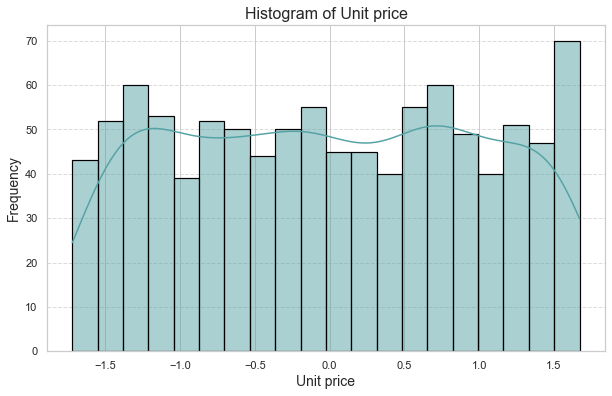

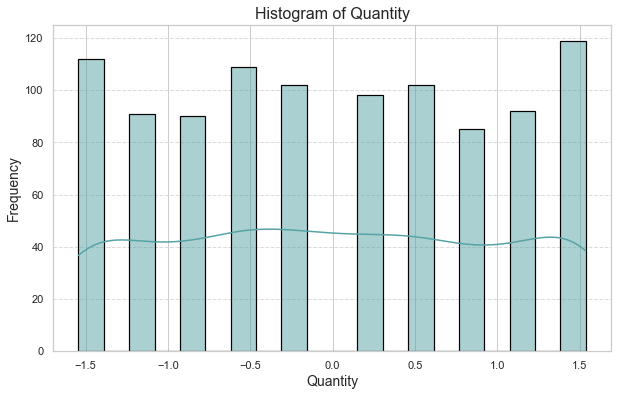

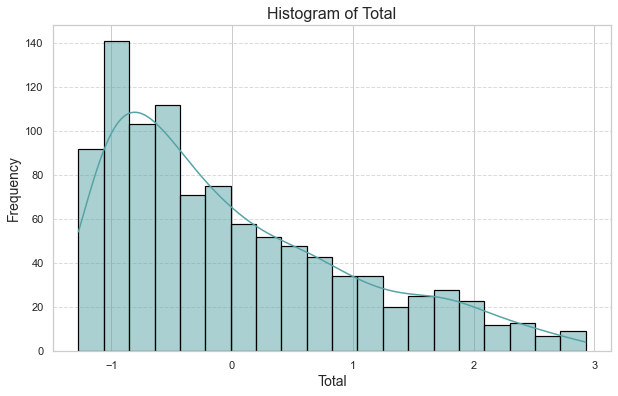

In [35]:
#to check distributions we use Histograms
numerical_columns = ['Unit price', 'Quantity', 'Total']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_2[column], bins=20, kde=True, color='#56A3A6', edgecolor='black', linewidth=1.2)
    plt.title(f'Histogram of {column}',fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### PCA

In [36]:
df_2 = df_2.drop(columns=['Invoice ID', 'Date'])

In [37]:
df_2.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Time,Payment,gross margin percentage,Rating
0,A,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,13:08:00,Ewallet,4.761905,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,10:29:00,Cash,4.761905,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,13:23:00,Credit card,4.761905,7.4
3,A,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,20:33:00,Ewallet,4.761905,8.4
4,A,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,10:37:00,Ewallet,4.761905,5.3


In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Time                     1000 non-null   object 
 9   Payment                  1000 non-null   object 
 10  gross margin percentage  1000 non-null   float64
 11  Rating                   1000 non-null   float64
dtypes: float64(5), object(7)
memory usage: 93.9+ KB


In [39]:
df_2['Time'] = pd.to_datetime(df_2['Time'].astype(str))

# Extract only the hour from the 'Time' column
df_2['Hour'] = df_2['Time'].dt.hour

# Convert 'Hour' column to numerical format
df_2['Hour'] = df_2['Hour'].astype(float)

# Drop the original 'Time' column
df_2.drop(columns=['Time'], inplace=True)

In [40]:
df_2.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,gross margin percentage,Rating,Hour
0,A,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,Ewallet,4.761905,9.1,13.0
1,C,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,Cash,4.761905,9.6,10.0
2,A,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,Credit card,4.761905,7.4,13.0
3,A,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,Ewallet,4.761905,8.4,20.0
4,A,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,Ewallet,4.761905,5.3,10.0


### Convert Categorical Columns to Dummy variables to perform PCA
#### Collumns to be converted are:
1. Branch
2. City
3. Customre type
4. Product line
5. Payment
6. Gender

In [41]:
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender','Payment']
df_dummies = pd.get_dummies(df_2[categorical_columns])

df_2 = pd.concat([df_2, df_dummies], axis=1)
df_2.drop(columns=categorical_columns, inplace=True)

print(df_2.head())

             Product line  Unit price  Quantity     Total  \
0       Health and beauty    0.718160  0.509930  0.919607   
1  Electronic accessories   -1.525303 -0.174540 -0.987730   
2      Home and lifestyle   -0.352781  0.509930  0.071446   
3       Health and beauty    0.096214  0.852165  0.675780   
4       Sports and travel    1.156959  0.509930  1.267125   

   gross margin percentage  Rating  Hour  Branch_A  Branch_B  Branch_C  \
0                 4.761905     9.1  13.0         1         0         0   
1                 4.761905     9.6  10.0         0         0         1   
2                 4.761905     7.4  13.0         1         0         0   
3                 4.761905     8.4  20.0         1         0         0   
4                 4.761905     5.3  10.0         1         0         0   

   City_Mandalay  City_Naypyitaw  City_Yangon  Customer type_Member  \
0              0               0            1                     1   
1              0               1            0 

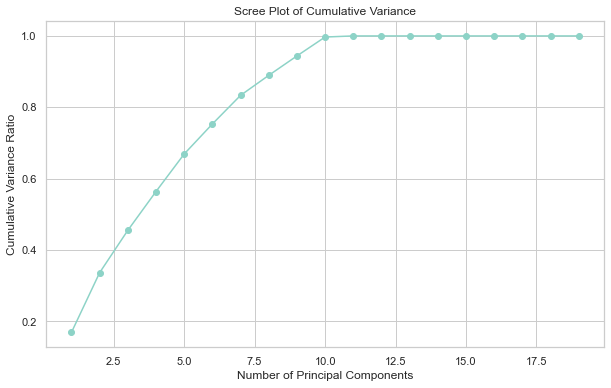

Number of Principal Components to capture at least 95% of variance: 9


In [42]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Assuming df_2 is the DataFrame containing the provided data
# Drop the target variable (Product line) from the features
X = df_2.drop('Product line', axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot of PC variances
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot of Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()

# Determine the number of principal components to capture at least 95% of variance
n_components_95 = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.95])

print(f"Number of Principal Components to capture at least 95% of variance: {n_components_95}")

# Use the determined number of components for transformation
pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_scaled)

# Now X_pca_final contains the reduced-dimensional representation of the data using PCA
# You can use X_pca_final for further analysis or clustering

# Optional: If you want to add the target variable back to the PCA results
X_pca_final_with_target = pd.DataFrame(X_pca_final, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])
X_pca_final_with_target['Product line'] = df_2['Product line']


In [43]:
# Extract the loadings (eigenvectors) for each principal component
loadings = pd.DataFrame(pca_final.components_.T, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)], index=X.columns)

# Display the PCA loadings
print("PCA Loadings:")
print(loadings)


PCA Loadings:
                              PC1           PC2           PC3           PC4  \
Unit price              -0.044089 -1.276724e-02 -1.499474e-01  1.977089e-01   
Quantity                -0.043202 -2.139641e-02 -2.445841e-01  2.748995e-01   
Total                   -0.066927 -2.692097e-02 -2.806257e-01  3.372541e-01   
gross margin percentage  0.000000 -2.498002e-16  6.938894e-17 -1.249001e-16   
Rating                   0.003755 -5.424096e-02  3.470974e-02 -5.366750e-03   
Hour                    -0.025407  4.591100e-02  6.101740e-02 -7.818310e-02   
Branch_A                 0.531268 -2.038290e-01 -7.573585e-02  2.118127e-02   
Branch_B                -0.100684  5.658232e-01 -2.770827e-02  1.824946e-02   
Branch_C                -0.435054 -3.619033e-01  1.042109e-01 -3.967751e-02   
City_Mandalay           -0.100684  5.658232e-01 -2.770827e-02  1.824946e-02   
City_Naypyitaw          -0.435054 -3.619033e-01  1.042109e-01 -3.967751e-02   
City_Yangon              0.531268 -2.0

C:\Users\nachi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


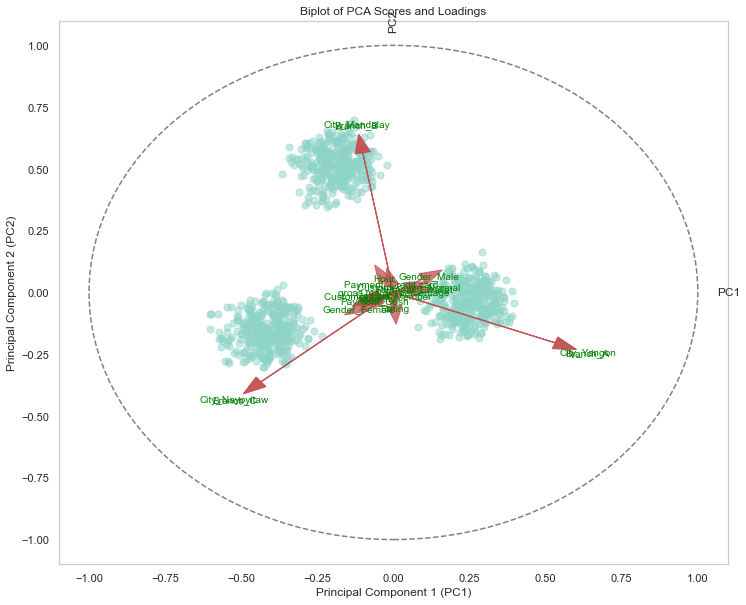

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 10))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=50, alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.75, head_width=0.05)
        if labels is None:
            plt.text(coeff[i, 0] * 1.2, coeff[i, 1] * 1.2, "Var" + str(i + 1), color='green', ha='center', va='center', fontsize=10)
        else:
            plt.text(coeff[i, 0] * 1.2, coeff[i, 1] * 1.2, labels[i], color='green', ha='center', va='center', fontsize=10)

    plt.xlabel("Principal Component 1 (PC1)")
    plt.ylabel("Principal Component 2 (PC2)")
    plt.title("Biplot of PCA Scores and Loadings")
    plt.grid()

    # Adding unit circle for reference
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dashed', linewidth=1.5)
    plt.gca().add_patch(circle)

    # Explaining the axes
    plt.text(1.1, 0, 'PC1', fontsize=12, ha='center', va='center', rotation=0)
    plt.text(0, 1.1, 'PC2', fontsize=12, ha='center', va='center', rotation=90)

    # Show the biplot
    plt.show()

# Apply the biplot function
biplot(pca_final.transform(X), np.transpose(pca_final.components_), labels=X.columns)


In [45]:
# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(pca.components_.T @ np.diag(pca.explained_variance_))

# Print eigenvalues
print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[ 9.59133012e-01+5.84427966e-01j  9.59133012e-01-5.84427966e-01j
 -7.51515932e-01+1.13041070e+00j -7.51515932e-01-1.13041070e+00j
 -1.20972385e+00+0.00000000e+00j -1.43391035e-01+0.00000000e+00j
  2.97234010e-03+0.00000000e+00j  2.06508996e-15+2.03979059e-12j
  2.06508996e-15-2.03979059e-12j -3.65486209e-15+0.00000000e+00j
 -8.34757777e-16+0.00000000e+00j  4.66233469e-16+0.00000000e+00j
  2.17591015e-17+0.00000000e+00j  2.10828584e-18+0.00000000e+00j
 -5.51731110e-25+0.00000000e+00j  2.72280558e-29+1.15129800e-28j
  2.72280558e-29-1.15129800e-28j -1.63769261e-30+0.00000000e+00j
  5.26972675e-31+0.00000000e+00j]


In [46]:
X_pca_final_with_target.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Product line
0,1.975556,-1.124873,-2.267212,0.304444,0.444272,-1.341706,-1.296979,1.398897,-0.228474,Health and beauty
1,-1.892746,-1.788977,0.886484,1.084775,-2.507078,1.349855,-0.329713,1.653474,1.159637,Electronic accessories
2,2.500356,-0.709763,1.021953,0.445429,0.536167,0.009330,2.227657,0.361821,0.664332,Home and lifestyle
3,2.331005,-0.777762,-0.267207,-1.139855,2.064104,-1.186608,-0.979353,-0.110550,0.322128,Health and beauty
4,2.502892,-0.780743,0.928978,1.562180,2.035795,-0.932981,-0.546534,0.223042,-0.077079,Sports and travel


### Kmeans

In [47]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, max_iter=500, verbose=1)

# Fit and predict clusters
clusters_pca = kmeans.fit_predict(X_pca_final_with_target.iloc[:, :-1])

# Add the cluster information to the dataframe
X_pca_final_with_target['Cluster'] = clusters_pca

# Display the first few rows of the dataframe with cluster information
print(X_pca_final_with_target.head())


Initialization complete
Iteration 0, inertia 16881.986797643625
Iteration 1, inertia 10716.956394389219
Iteration 2, inertia 10107.19649869159
Iteration 3, inertia 9932.319591736881
Iteration 4, inertia 9869.318500579182
Iteration 5, inertia 9857.557092770714
Iteration 6, inertia 9853.08432870323
Iteration 7, inertia 9845.182754754254
Iteration 8, inertia 9835.215190098905
Iteration 9, inertia 9827.944470889186
Iteration 10, inertia 9818.97005970641
Iteration 11, inertia 9798.45057319783
Iteration 12, inertia 9767.719850289204
Iteration 13, inertia 9709.817939210285
Iteration 14, inertia 9620.405287466137
Iteration 15, inertia 9612.529021509104
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 15729.39682307766
Iteration 1, inertia 10300.666808618445
Iteration 2, inertia 10066.023263949308
Iteration 3, inertia 10004.127303698062
Iteration 4, inertia 9881.141530726718
Iteration 5, inertia 9838.03046453517
Converged at iteration 5: strict converg

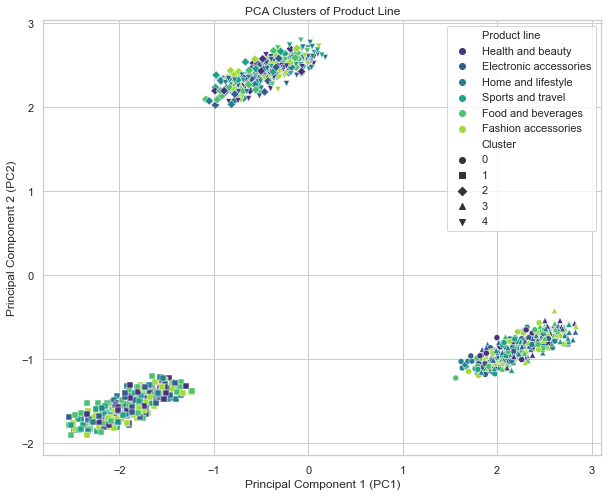

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Product line', palette='viridis', data=X_pca_final_with_target, style='Cluster', markers=['o', 's', 'D', '^', 'v'])

# Set plot labels and title
plt.title('PCA Clusters of Product Line')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

# Silhouette Analysis
silhouette_avg_pca = silhouette_score(X_pca_final_with_target.iloc[:, :-2], clusters_pca)
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

Silhouette Score (PCA): 0.19928247292867268


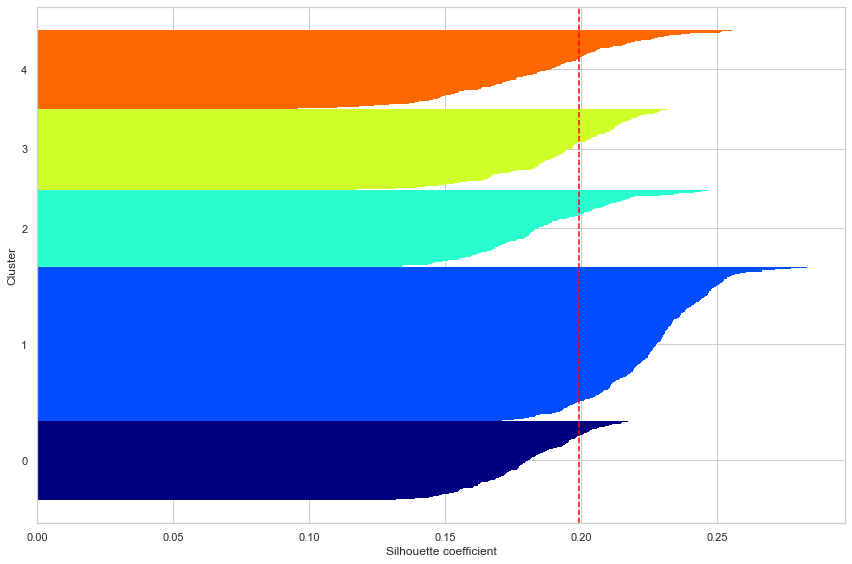

In [54]:
def plot_silhouettes_pca(data, clusters, metric='euclidean'):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    
    # Increase the plot size before plotting
    plt.figure(figsize=(12, 8))

    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()

# Plotting the silhouette for PCA
plot_silhouettes_pca(X_pca_final_with_target.iloc[:, :-2], clusters_pca)


In [55]:
# Completeness and Homogeneity
completeness_pca = completeness_score(X_pca_final_with_target['Product line'], clusters_pca)
homogeneity_pca = homogeneity_score(X_pca_final_with_target['Product line'], clusters_pca)

print(f"\nCompleteness (PCA): {completeness_pca}")
print(f"Homogeneity (PCA): {homogeneity_pca}")


Completeness (PCA): 0.004989337522251444
Homogeneity (PCA): 0.004359110940679496


### Run KMeans for a range of values

In [57]:
from sklearn.cluster import KMeans
import pandas as pd

# Define the range of clusters to experiment with
cluster_range = range(2, 11)

# Drop the target variable column
X_pca_features = X_pca_final_with_target.iloc[:, :-2]

# Initialize an empty DataFrame to store the results
kmeans_results = pd.DataFrame(index=cluster_range, columns=['Inertia', 'Silhouette Score'])

# Iterate over the cluster range
for n_clusters in cluster_range:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=42)
    
    # Fit and predict clusters
    clusters_pca = kmeans.fit_predict(X_pca_features)
    
    # Calculate Inertia and Silhouette Score
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_pca_features, clusters_pca)
    
    # Store the results in the DataFrame
    kmeans_results.loc[n_clusters, 'Inertia'] = inertia
    kmeans_results.loc[n_clusters, 'Silhouette Score'] = silhouette_avg

# Display the KMeans results
print(kmeans_results)


         Inertia Silhouette Score
2   13963.627551         0.181735
3   10966.126008         0.270759
4   10274.052596         0.215801
5    9604.840132         0.199258
6    8929.212798           0.1861
7    8611.785893         0.178258
8    8319.382386         0.193496
9    7901.579267         0.169298
10   7637.499167          0.18252


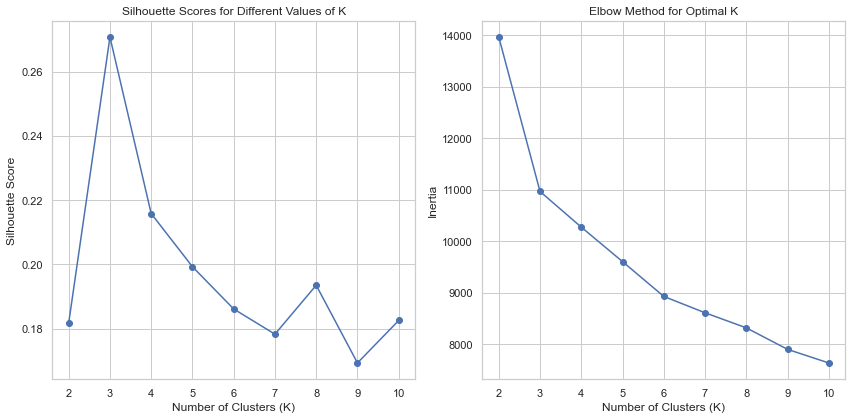

In [58]:
import matplotlib.pyplot as plt

# Plotting Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(kmeans_results.index, kmeans_results['Silhouette Score'], marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plotting Elbow (Inertia) Plot
plt.subplot(1, 2, 2)
plt.plot(kmeans_results.index, kmeans_results['Inertia'], marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()


### Based on the analysis of the Inertia and Silhouette Score, it appears that the optimal number of clusters (K) is three. The Inertia decreases as the number of clusters increases, but it's crucial to strike a balance. The Silhouette Score, which measures the clarity of cluster boundaries, is highest at K=3, indicating well-defined clusters. Therefore, we would recommend using K=3 for the number of clusters in the KMeans algorithm for this dataset. 

### Let Us run Kmeans clustering with K=3 finally

In [82]:
n_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=42)

# Fit and predict clusters
clusters_pca = kmeans.fit_predict(X_pca_final_with_target.iloc[:, :-2])

# Add the cluster information to the dataframe
X_pca_final_with_target['Cluster'] = clusters_pca

# Display the first few rows of the dataframe with cluster information
print(X_pca_final_with_target.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.975556 -1.124873 -2.267212  0.304444  0.444272 -1.341706 -1.296979   
1 -1.892746 -1.788977  0.886484  1.084775 -2.507078  1.349855 -0.329713   
2  2.500356 -0.709763  1.021953  0.445429  0.536167  0.009330  2.227657   
3  2.331005 -0.777762 -0.267207 -1.139855  2.064104 -1.186608 -0.979353   
4  2.502892 -0.780743  0.928978  1.562180  2.035795 -0.932981 -0.546534   

        PC8       PC9            Product line  Cluster  
0  1.398897 -0.228474       Health and beauty        2  
1  1.653474  1.159637  Electronic accessories        0  
2  0.361821  0.664332      Home and lifestyle        2  
3 -0.110550  0.322128       Health and beauty        2  
4  0.223042 -0.077079       Sports and travel        2  


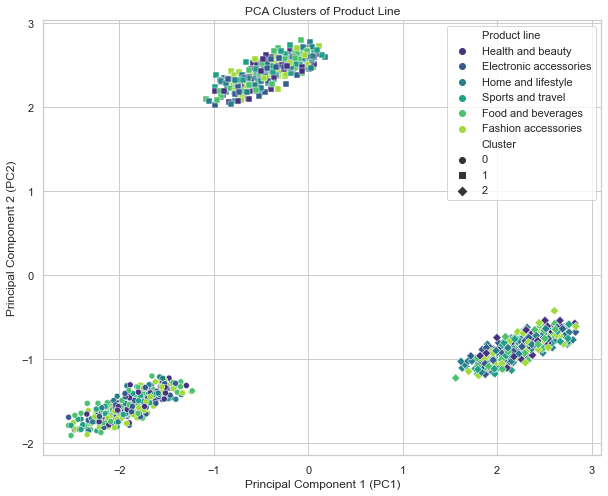

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Product line', palette='viridis', data=X_pca_final_with_target, style='Cluster', markers=['o', 's', 'D'])

# Set plot labels and title
plt.title('PCA Clusters of Product Line')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [85]:
silhouette_avg_pca = silhouette_score(X_pca_final_with_target.iloc[:, :-2], clusters_pca)
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

Silhouette Score (PCA): 0.2707593873949745


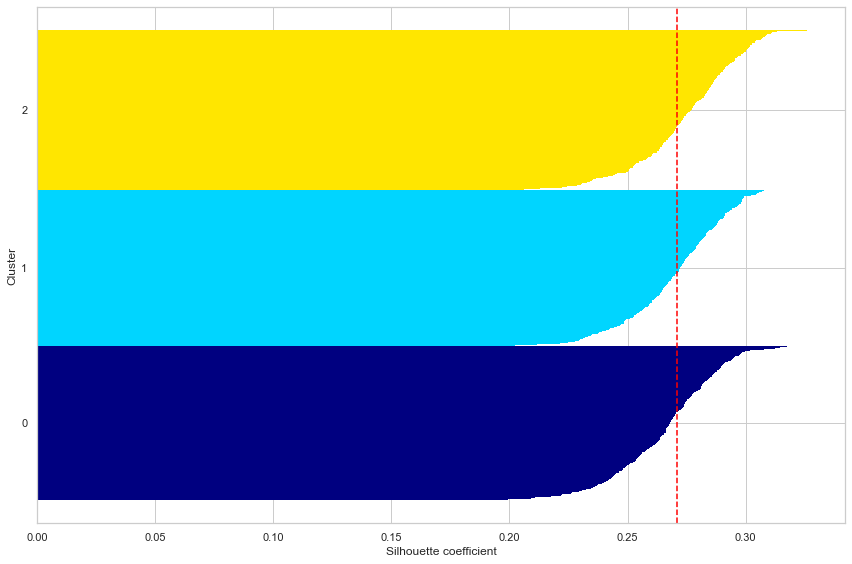

In [86]:
def plot_silhouettes_pca(data, clusters, metric='euclidean'):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    
    # Increase the plot size before plotting
    plt.figure(figsize=(12, 8))

    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()

# Plotting the silhouette for PCA
plot_silhouettes_pca(X_pca_final_with_target.iloc[:, :-2], clusters_pca)

In [87]:
# Completeness and Homogeneity
completeness_pca = completeness_score(X_pca_final_with_target['Product line'], clusters_pca)
homogeneity_pca = homogeneity_score(X_pca_final_with_target['Product line'], clusters_pca)

print(f"\nCompleteness (PCA): {completeness_pca}")
print(f"Homogeneity (PCA): {homogeneity_pca}")


Completeness (PCA): 0.0052854856892948976
Homogeneity (PCA): 0.0032429316797622162


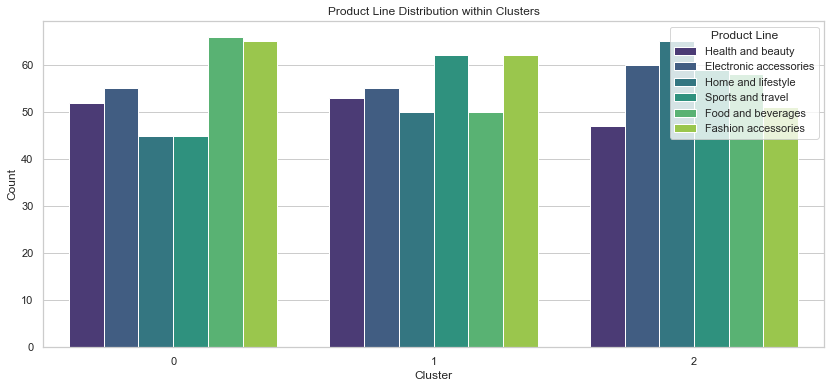

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot Product Line Distribution within Clusters
plt.figure(figsize=(14, 6))
sns.countplot(x='Cluster', hue='Product line', data=X_pca_final_with_target, palette='viridis')
plt.title('Product Line Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Product Line')

# Show the plot
plt.show()


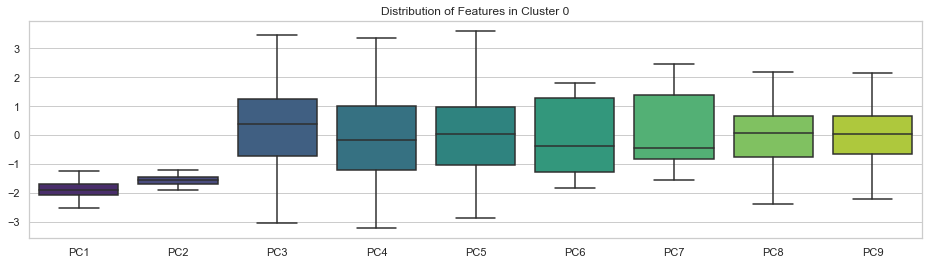

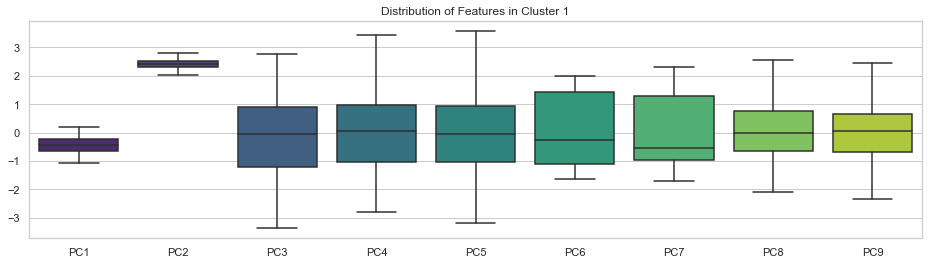

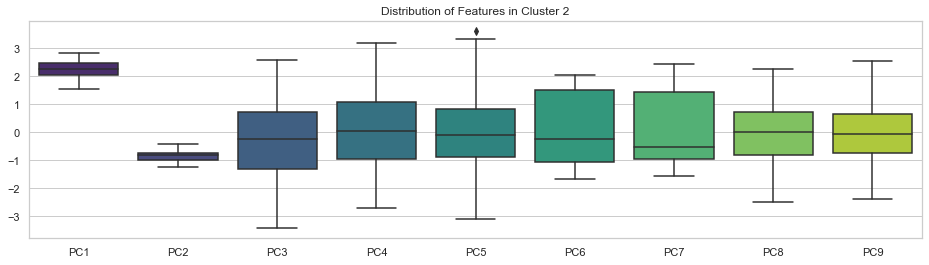

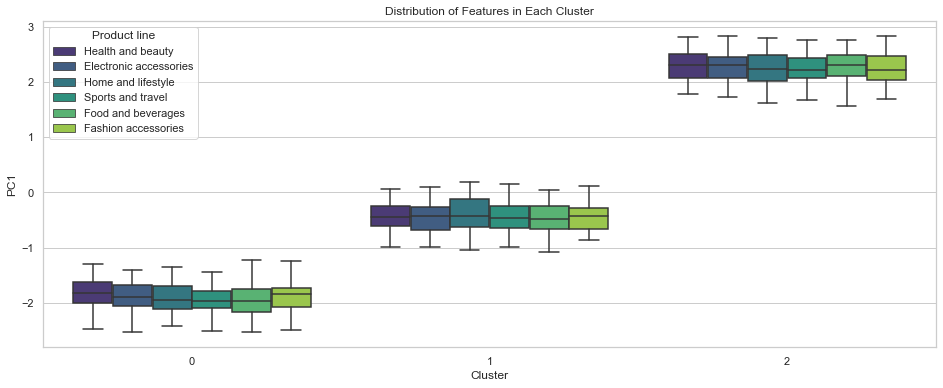

In [89]:
centroids = kmeans.cluster_centers_

# Assign cluster labels to the original dataframe
X_pca_final_with_target['Cluster'] = clusters

# Create subplots for each cluster
for cluster_num in range(n_clusters):
    cluster_data = X_pca_final_with_target[X_pca_final_with_target['Cluster'] == cluster_num].iloc[:, :-2]
    
    # Plot the distribution of original features within each cluster
    plt.figure(figsize=(16, 4))
    sns.boxplot(data=cluster_data, palette='viridis')
    plt.title(f'Distribution of Features in Cluster {cluster_num}')
    plt.show()

# Show the overall distribution of features across clusters
plt.figure(figsize=(16, 6))
sns.boxplot(x='Cluster', y='PC1', hue='Product line', data=X_pca_final_with_target, palette='viridis')
plt.title('Distribution of Features in Each Cluster')
plt.show()

In [90]:
scores_df = pd.DataFrame(columns=['Product Line', 'Cluster', 'PC1 Score', 'PC2 Score', 'PC3 Score', 'PC4 Score', 'PC5 Score', 'PC6 Score', 'PC7 Score', 'PC8 Score', 'PC9 Score'])

# Loop through each product line and cluster
for product_line in X_pca_final_with_target['Product line'].unique():
    for cluster_num in range(n_clusters):
        # Filter data for the specific product line and cluster
        subset = X_pca_final_with_target[(X_pca_final_with_target['Product line'] == product_line) & (X_pca_final_with_target['Cluster'] == cluster_num)].iloc[:, :-2]
        
        # Calculate mean scores for each principal component
        mean_scores = subset.mean()
        
        # Add the scores to the DataFrame
        scores_df = scores_df.append({
            'Product Line': product_line,
            'Cluster': cluster_num,
            'PC1 Score': mean_scores['PC1'],
            'PC2 Score': mean_scores['PC2'],
            'PC3 Score': mean_scores['PC3'],
            'PC4 Score': mean_scores['PC4'],
            'PC5 Score': mean_scores['PC5'],
            'PC6 Score': mean_scores['PC6'],
            'PC7 Score': mean_scores['PC7'],
            'PC8 Score': mean_scores['PC8'],
            'PC9 Score': mean_scores['PC9'],
        }, ignore_index=True)

# Display the scores DataFrame
print(scores_df)

              Product Line Cluster PC1 Score PC2 Score PC3 Score PC4 Score  \
0        Health and beauty       0 -1.830129 -1.522004  0.586099 -0.234588   
1        Health and beauty       1 -0.411327   2.41419  0.003203  0.098579   
2        Health and beauty       2  2.276398 -0.831217 -0.056881 -0.029805   
3   Electronic accessories       0 -1.882849 -1.557648   0.60313  0.284783   
4   Electronic accessories       1 -0.453767  2.402473 -0.072115  0.071589   
5   Electronic accessories       2     2.256  -0.84724 -0.261621 -0.038846   
6       Home and lifestyle       0 -1.895122 -1.558942   0.16858 -0.408942   
7       Home and lifestyle       1 -0.392521  2.428948  0.078466  0.262339   
8       Home and lifestyle       2  2.230242 -0.876696 -0.356261  0.126446   
9        Sports and travel       0 -1.952728 -1.583925 -0.130751 -0.226029   
10       Sports and travel       1 -0.447571  2.415609 -0.071641  0.110344   
11       Sports and travel       2  2.241991 -0.874528 -0.278666

### Patterns and analysis:

Cluster Separation: Clusters 0, 1, and 2 show distinctive patterns in the scores across all principal components for each product line. Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, and Fashion accessories all have different positions within each cluster.

Principal Component Contributions: PC1 and PC2 have significant contributions to the separation of clusters.
Negative scores in PC1 and PC2 for Cluster 0 suggest a commonality among product lines in this cluster, while positive scores in PC1 and PC2 for Cluster 2 indicate a different set of preferences.
PC3 to PC9 contribute to additional nuances in the clustering, capturing more detailed variations in product line preferences.

Product Line Analysis: Health and beauty in Cluster 0 has negative scores in PC1 and PC2, suggesting a preference for products with lower scores in these components. Electronic accessories in Cluster 1 has positive scores in PC1 and PC2, indicating a preference for products with higher scores in these components. Home and lifestyle in Cluster 2 shows a mix of positive and negative scores across different principal components. Sports and travel, Food and beverages, and Fashion accessories exhibit similar patterns of differentiation across clusters.

Customer Segmentation: The clustering provides a basis for customer segmentation, grouping products and customers with similar preferences. Businesses can target marketing strategies based on the preferences identified in each cluster, tailoring their approach to meet the specific needs of different customer groups. Understanding the principal component contributions helps in interpreting the factors that influence customer preferences.

Recommendations for Business Strategy: Businesses can use this information to optimize product recommendations for each customer segment. Tailoring marketing campaigns and promotions based on the identified patterns can enhance customer engagement and satisfaction. Further analysis of specific product features corresponding to each principal component can guide product development and inventory management.